## Desafio 2


Ajuste o classificador baseado na implementação YOLOv3 para anlisar a imagem abaixo (“imagens/desk.jpg”) de modo a identificar o máximo de objetos em cena. 

<img src="imagens/desk.jpg">

Após regular a detecção de objetos (utilize o método list_objects da classe utils.py), liste os objetos detectados e a quantidade deles, realizando uma auditoria.

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from utils import *
from darknet import Darknet
from collections import Counter

In [8]:
# Configurações na rede neural YOLOv3
cfg_file = '../cfg/yolov3.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = '../pesos/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = '../data/coco.names'
class_names = load_class_names(namesfile)

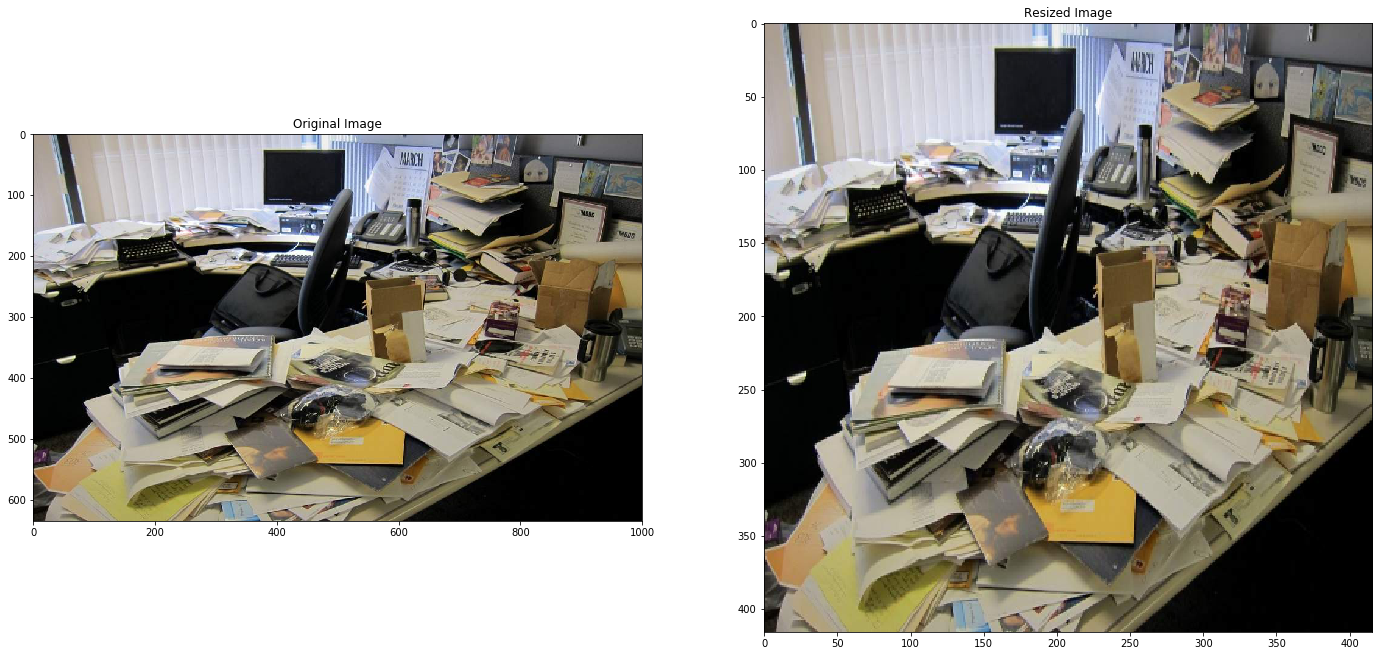

In [9]:
# Tamanho da figura
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregando imagem para classificar
img = cv2.imread('imagens/desk.jpg')

# Convertendo para o espaço de cores RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionando imagem para ser compatível com a primeira camada da rede neural  
resized_image = cv2.resize(original_image, (m.width, m.height))

# Exibição das imagens
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()



It took 1.329 seconds to detect the objects in the image.

Number of Objects Detected: 42 

Objects Found and Confidence Level:

1. tv: 0.999942
2. livro: 0.999999
3. livro: 1.000000
4. teclado: 0.999999
5. livro: 0.999997
6. livro: 0.999997
7. livro: 0.999987
8. livro: 0.999996
9. mochila: 0.538852
10. livro: 0.999990
11. livro: 0.999997
12. livro: 0.999998
13. livro: 0.999992
14. livro: 0.999988
15. teclado: 0.973993
16. livro: 0.999964
17. livro: 0.999991
18. livro: 0.999987
19. livro: 0.999978
20. livro: 0.999994
21. livro: 0.999980
22. computador portátil: 0.545153
23. livro: 0.999985
24. celular: 0.896701
25. livro: 0.998553
26. livro: 0.999964
27. livro: 0.999999
28. livro: 0.999918
29. teclado: 0.999984
30. livro: 0.999964
31. livro: 0.999838
32. livro: 0.999995
33. livro: 0.999992
34. livro: 0.999991
35. livro: 0.999948
36. livro: 0.997920
37. livro: 0.999957
38. livro: 0.992075
39. livro: 0.999969
40. livro: 0.991844
41. livro: 0.999994
42. livro: 0.999982


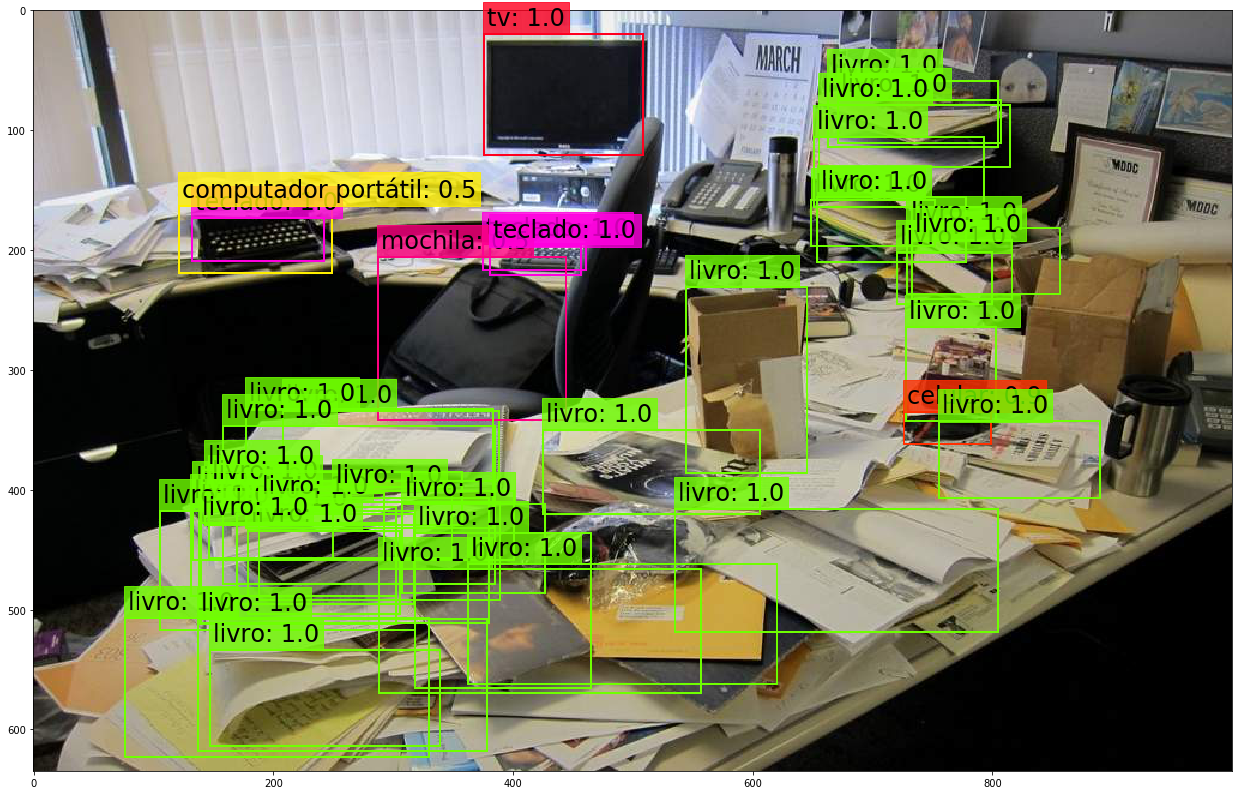

In [10]:
# Patamar de NMS (Non-Maximum Supression)
# Ajuste de sensibilidade de imagens com baixa luminosidade
nms_thresh = 0.1
# Patamar do IOU (Intersect of Union), indicador se o retângulo 
# de identificação de imagem foi adequadamente desenhado
iou_thresh = 0.7

# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Objetos encontrados e nível de confiança
print_objects(boxes, class_names)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [11]:
objects = list_objects(boxes, class_names)

In [12]:
counter_objects = Counter(objects)

In [13]:
counter_objects

Counter({'celular': 1,
         'computador portátil': 1,
         'livro': 35,
         'mochila': 1,
         'teclado': 3,
         'tv': 1})